# Train BlazePalm Model

In [1]:
import os
import glob
import json

import tensorflow as tf
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from utils import anchors_generator, encoder, loss_function
from nets import blaze_palm 
from utils.data_generator import DataGenerator

In [2]:
tf.__version__

'2.2.0'

## Create BlazePalm Model

In [3]:
model = blaze_palm.build_blaze_palm_model()

In [4]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
activation (Activation)         (None, 128, 128, 32) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
depthwise_conv2d (DepthwiseConv (None, 128, 128, 32) 320         activation[0][0]                 
______________________________________________________________________________________________

In [5]:
adam = tf.keras.optimizers.Adam()
ssd_loss = loss_function.SSDLoss()
model.compile(optimizer='adam', loss=ssd_loss.compute_loss)

## Prepare Data

In [6]:
train_data_generator = DataGenerator(image_dir=os.path.join('dataset', 'image'), batch_size=32,
                                     annotation_dir=os.path.join('dataset', 'annotation'))
val_data_generator = DataGenerator(image_dir=os.path.join('dataset', 'image'), batch_size=32,
                                     annotation_dir=os.path.join('dataset', 'annotation'))

In [7]:
batch = train_data_generator.__getitem__(0)
ssd_loss.compute_loss(batch[1], model.predict(batch[0]))

<tf.Tensor: shape=(32,), dtype=float32, numpy=
array([17.41805  , 16.663563 ,  7.138943 ,  5.421281 ,  8.159655 ,
        5.9382806,  2.3657637, 11.056917 ,  4.107141 , 16.004013 ,
       18.992027 ,  5.106953 ,  9.778056 ,  3.109959 , 11.355966 ,
        5.9500937, 11.808287 ,  6.2568884, 12.042641 ,  6.3611803,
        7.210039 ,  7.8289447, 17.70705  , 18.141031 , 16.669252 ,
        8.701041 , 16.362648 ,  6.478456 , 15.751408 ,  7.463688 ,
        1.5787891, 12.620292 ], dtype=float32)>

## Training

> `fit_generator` not work

In [8]:
history = model.fit(x=train_data_generator, epochs=1000)

Epoch 1/1000
4/4 [==============================] - 2s 478ms/step - loss: 10.2775
Epoch 2/1000
4/4 [==============================] - 2s 449ms/step - loss: 10.2589
Epoch 3/1000
4/4 [==============================] - 2s 454ms/step - loss: 9.1919
Epoch 4/1000
4/4 [==============================] - 2s 449ms/step - loss: 8.3955
Epoch 5/1000
4/4 [==============================] - 2s 480ms/step - loss: 7.7757
Epoch 6/1000
4/4 [==============================] - 2s 426ms/step - loss: 7.6376
Epoch 7/1000
4/4 [==============================] - 2s 437ms/step - loss: 7.4667
Epoch 8/1000
4/4 [==============================] - 2s 427ms/step - loss: 7.2754
Epoch 9/1000
4/4 [==============================] - 2s 463ms/step - loss: 7.2485
Epoch 10/1000
4/4 [==============================] - 2s 447ms/step - loss: 7.3098
Epoch 11/1000
4/4 [==============================] - 2s 452ms/step - loss: 7.1401
Epoch 12/1000
4/4 [==============================] - 2s 447ms/step - loss: 7.0904
Epoch 13/1000
4/4 [====

Epoch 101/1000
4/4 [==============================] - 2s 472ms/step - loss: 3.2409
Epoch 102/1000
4/4 [==============================] - 2s 456ms/step - loss: 3.2576
Epoch 103/1000
4/4 [==============================] - 2s 429ms/step - loss: 3.2130
Epoch 104/1000
4/4 [==============================] - 2s 439ms/step - loss: 3.1597
Epoch 105/1000
4/4 [==============================] - 2s 386ms/step - loss: 3.0670
Epoch 106/1000
4/4 [==============================] - 2s 396ms/step - loss: 3.0713
Epoch 107/1000
4/4 [==============================] - 2s 388ms/step - loss: 2.9803
Epoch 108/1000
4/4 [==============================] - 2s 415ms/step - loss: 2.9111
Epoch 109/1000
4/4 [==============================] - 2s 422ms/step - loss: 2.8942
Epoch 110/1000
4/4 [==============================] - 2s 418ms/step - loss: 2.8255
Epoch 111/1000
4/4 [==============================] - 2s 421ms/step - loss: 2.8325
Epoch 112/1000
4/4 [==============================] - 2s 424ms/step - loss: 2.7577
Epoc

4/4 [==============================] - 2s 424ms/step - loss: 1.5375
Epoch 200/1000
4/4 [==============================] - 2s 431ms/step - loss: 1.5575
Epoch 201/1000
4/4 [==============================] - 2s 426ms/step - loss: 1.5489
Epoch 202/1000
4/4 [==============================] - 2s 430ms/step - loss: 1.5409
Epoch 203/1000
4/4 [==============================] - 2s 415ms/step - loss: 1.5606
Epoch 204/1000
4/4 [==============================] - 2s 436ms/step - loss: 1.5347
Epoch 205/1000
4/4 [==============================] - 2s 451ms/step - loss: 1.5082
Epoch 206/1000
4/4 [==============================] - 2s 408ms/step - loss: 1.4881
Epoch 207/1000
4/4 [==============================] - 2s 407ms/step - loss: 1.4713
Epoch 208/1000
4/4 [==============================] - 2s 434ms/step - loss: 1.4874
Epoch 209/1000
4/4 [==============================] - 2s 447ms/step - loss: 1.4828
Epoch 210/1000
4/4 [==============================] - 2s 438ms/step - loss: 1.5080
Epoch 211/1000
4/4 

4/4 [==============================] - 2s 428ms/step - loss: 1.4027
Epoch 298/1000
4/4 [==============================] - 2s 474ms/step - loss: 1.4173
Epoch 299/1000
4/4 [==============================] - 2s 452ms/step - loss: 1.4389
Epoch 300/1000
4/4 [==============================] - 2s 459ms/step - loss: 1.4567
Epoch 301/1000
4/4 [==============================] - 2s 498ms/step - loss: 1.4411
Epoch 302/1000
4/4 [==============================] - 2s 437ms/step - loss: 1.4912
Epoch 303/1000
4/4 [==============================] - 2s 473ms/step - loss: 1.4756
Epoch 304/1000
4/4 [==============================] - 2s 433ms/step - loss: 1.4352
Epoch 305/1000
4/4 [==============================] - 2s 418ms/step - loss: 1.4477
Epoch 306/1000
4/4 [==============================] - 2s 476ms/step - loss: 1.4622
Epoch 307/1000
4/4 [==============================] - 2s 457ms/step - loss: 1.4387
Epoch 308/1000
4/4 [==============================] - 2s 477ms/step - loss: 1.4174
Epoch 309/1000
4/4 

KeyboardInterrupt: 

## Test Model

In [22]:
from utils.anchor_config import AnchorsConfig
from utils.anchors_generator import AnchorsGenerator
from utils.encoder import center_to_corner

In [23]:
def sigmoid(values):
    return 1/(1+np.exp(-values))

In [24]:
def non_max_suppression_fast(boxes, probabilities=None, overlap_threshold=0.3):
    """
    Algorithm to filter bounding box proposals by removing the ones with a too low confidence score
    and with too much overlap.
    Source: https://www.pyimagesearch.com/2015/02/16/faster-non-maximum-suppression-python/
    :param boxes: List of proposed bounding boxes
    :param overlap_threshold: the maximum overlap that is allowed
    :return: filtered boxes
    """
    # if there are no boxes, return an empty list
    if boxes.shape[1] == 0:
        return []
    # if the bounding boxes integers, convert them to floats --
    # this is important since we'll be doing a bunch of divisions
    if boxes.dtype.kind == "i":
        boxes = boxes.astype("float")
    # initialize the list of picked indexes
    pick = []
    # grab the coordinates of the bounding boxes
    x1 = boxes[:, 0] - (boxes[:, 2] / [2])  # center x - width/2
    y1 = boxes[:, 1] - (boxes[:, 3] / [2])  # center y - height/2
    x2 = boxes[:, 0] + (boxes[:, 2] / [2])  # center x + width/2
    y2 = boxes[:, 1] + (boxes[:, 3] / [2])  # center y + height/2

    # compute the area of the bounding boxes and grab the indexes to sort
    # (in the case that no probabilities are provided, simply sort on the
    # bottom-left y-coordinate)
    area = boxes[:, 2] * boxes[:, 3]  # width * height
    idxs = y2


    # if probabilities are provided, sort on them instead
    if probabilities is not None:
        idxs = probabilities

    # sort the indexes
    idxs = np.argsort(idxs)
    # keep looping while some indexes still remain in the indexes
    # list
    while len(idxs) > 0:
        # grab the last index in the indexes list and add the
        # index value to the list of picked indexes
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)
        # find the largest (x, y) coordinates for the start of
        # the bounding box and the smallest (x, y) coordinates
        # for the end of the bounding box
        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])
        # compute the width and height of the bounding box
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)
        # compute the ratio of overlap
        overlap = (w * h) / area[idxs[:last]]
        # delete all indexes from the index list that have
        idxs = np.delete(idxs, np.concatenate(([last],
                                               np.where(overlap > overlap_threshold)[0])))
    # return only the bounding boxes that were picked
    return pick

In [67]:
def preprocess(bgr_image, w, h, normailze=True):
    # convert to rgb
    rgb_image = bgr_image[:, :, ::-1]
    # pad to square and resize
    shape = np.r_[rgb_image.shape]
    padding = (shape.max() - shape[:2]).astype('uint32') // 2
    rgb_image = np.pad(rgb_image, ((padding[0], padding[0]), (padding[1], padding[1]), (0, 0)), mode='constant')
    rgb_image = cv2.resize(rgb_image, (w, h))
    rgb_image = np.ascontiguousarray(rgb_image)
    # normalize
    if normailze:
        rgb_image = np.ascontiguousarray(2 * ((rgb_image / 255) - 0.5).astype('float32'))
    # reshape as input shape
    rgb_image = rgb_image[tf.newaxis, ...]
    return rgb_image

In [26]:
anchor_config = AnchorsConfig(fixed_anchor_size=False)
anchor_generator = AnchorsGenerator(anchor_config)
anchors = anchor_generator.generate()
anchors_normalized = np.array([[anchor.x_center,anchor.y_center, anchor.w, anchor.h] for anchor in anchors])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


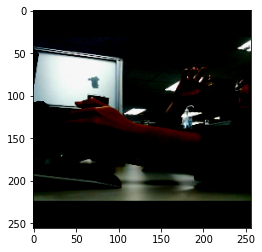

In [27]:
image_path = np.random.choice(glob.glob(os.path.join('dataset','image','*.jpg')))
image = preprocess(cv2.imread(image_path), 256, 256)
plt.imshow(image[0])

In [28]:
pred = model.predict(image)

In [29]:
output_clf = pred[:,:,0][0]
output_reg = pred[:,:,1:][0]
scores = sigmoid(output_clf)

output_reg = output_reg[scores>0.9999999]
output_clf = output_clf[scores>0.9999999]
candidate_anchors = anchors_normalized[scores>0.9999999]

moved_output_reg = output_reg.copy()
moved_output_reg[:, :2] = moved_output_reg[:, :2] + candidate_anchors[:, :2] * 256

box_ids = non_max_suppression_fast(moved_output_reg[:, :4], output_clf)

center_wo_offst = candidate_anchors[box_ids,:2] * 256
bboxes = moved_output_reg[box_ids, :4].astype('int')
keypoints_set = output_reg[box_ids,4:].reshape(-1, 7, 2)
for i in range(len(keypoints_set)):
    keypoints_set[i] = keypoints_set[i] + center_wo_offst[i]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


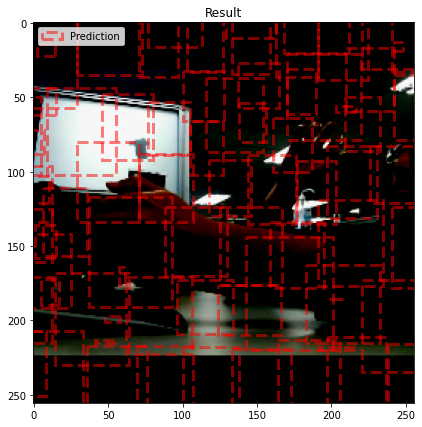

In [30]:
color = ['limegreen', 'r']
width = [3, 3]
style = ['-', '--']
alpha = [1, 0.5]


plt.figure(figsize=(7, 7))
plt.title("Result")
result_image = image.copy()[0]
    
for i in range(len(bboxes)):
    cx, cy, w, h = bboxes[i][:4]
    x1, y1, x2, y2 = (cx-w//2, cy-h//2, cx+w//2, cy+h//2)
    if i == 0:
        rect = patches.Rectangle((x1,y1), x2-x1, y2-y1, lw=width[1], ec=color[1], ls=style[1], alpha=alpha[1], facecolor="none", label='Prediction')
    else:
        rect = patches.Rectangle((x1,y1), x2-x1, y2-y1, lw=width[1], ec=color[1], ls=style[1], alpha=alpha[1], facecolor="none")
    plt.gca().add_patch(rect)
#     plt.scatter((x2+x1)/2, (y2+y1)/2, color=color[1], s=87)
#     for key_point in keypoints_set[i]:
#         plt.scatter(key_point[0], key_point[1], color=color[1], s=40)

plt.legend()
plt.imshow(result_image)
plt.show()

## Test Model

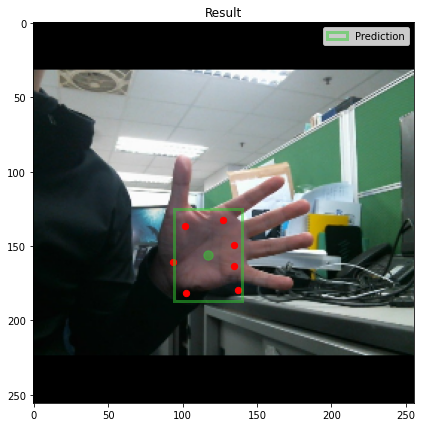

In [86]:
image_path = np.random.choice(glob.glob(os.path.join('dataset','image','*.jpg')))
image = preprocess(cv2.imread(image_path), 256, 256)
image_show = preprocess(cv2.imread(image_path), 256, 256, False)
# plt.imshow(image[0])

pred = model.predict(image)

pred_id = np.argmax(pred[0,:,0])
pred_loc = pred[0,:,1:][pred_id]
pred_loc[:2] = anchors_normalized[pred_id,:2]*256 + pred_loc[:2]
pred_loc[:4] = center_to_corner(np.array([pred_loc[:4]]))
pred_loc[4:] = (pred_loc[4:].reshape(-1, 2) + anchors_normalized[pred_id,:2]*256).reshape(-1)

color = ['limegreen', 'r']
width = [3, 3]
style = ['-', '--']
alpha = [1, 0.5]


plt.figure(figsize=(7, 7))
plt.title("Result")
result_image = image_show.copy()[0]    

x1, y1, x2, y2 = pred_loc[:4]
rect = patches.Rectangle((x1,y1), x2-x1, y2-y1, 
                         lw=width[1], ec=color[0],
                         ls=style[0], alpha=alpha[1], facecolor="none", label='Prediction')
plt.gca().add_patch(rect)
plt.scatter((x2+x1)/2, (y2+y1)/2, color=color[0], alpha=alpha[1], s=87)
for key_point in pred_loc[4:].reshape(-1, 2):
    plt.scatter(key_point[0], key_point[1], color=color[1], s=40)

plt.legend()
plt.imshow(result_image)
plt.show()